# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import cos, pi, sqrt

In [2]:
np.random.seed(0)

### Part 1: Generating Data Points

In [3]:
X = np.random.uniform(0, 2*pi,size = 30)
X

array([3.44829694, 4.49366732, 3.78727399, 3.42360201, 2.66190161,
       4.0582724 , 2.74944154, 5.60317502, 6.0548717 , 2.40923412,
       4.97455513, 3.32314479, 3.56912924, 5.8156952 , 0.44633272,
       0.54744954, 0.12703594, 5.23150478, 4.88930306, 5.46644755,
       6.14884039, 5.02126135, 2.89956035, 4.90420945, 0.74314013,
       4.02074236, 0.90071527, 5.93552986, 3.27886971, 2.60539781])

In [4]:
f1 = lambda x:cos(2*pi*x) + x/(2*pi)

In [5]:
Y = np.zeros(30)
for i in range(30):
    Y[i] = f1(X[i]) + np.random.normal(0, 0.004)
Y    

array([-0.39542421, -0.2869878 ,  0.84390669, -0.34791871, -0.10186278,
        1.57886294,  0.44020941,  0.10051949,  1.90543609, -0.45678549,
        1.77542111,  0.07739798, -0.34049009,  1.32737493, -0.86772702,
       -0.86394738,  0.71667283,  0.94735815,  1.54167714, -0.11352835,
        1.5654574 ,  1.79805192,  1.26683096,  1.6030553 ,  0.07017478,
        1.63455029,  0.94854812,  1.86288968,  0.33786585, -0.37241103])

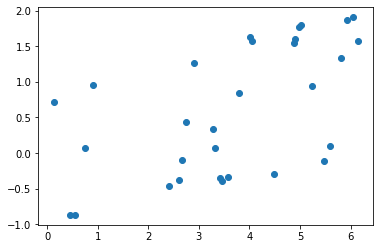

In [6]:
#Plotting Generated Points
plt.scatter(x=X, y= Y)
plt.show()

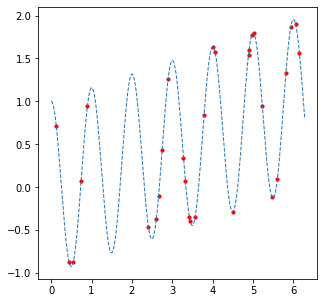

In [7]:
# Plotting the generated points along with the original function
X_ = np.arange(0, 2*pi, 0.001)     #equally spaced points by 0.001 to help in plotting functions precisely
Y_ = np.array([f1(x) for x in X_]) #corresponding function values at above points
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.plot(X_, Y_,'--',linewidth = 1)
plt.scatter(x = X, y = Y, color = 'red', s = 10)
plt.show()

## Part2:
#### <u>Fitting Polynomial Regression Model for different degrees:</u>

In [8]:
def train_poly_reg(m, X, Y):
    """
    m = degree of polynomial regression model to be trained
    X = 1-dimensional array of data, the input independent variable
    Y = 1-dimensional array of data denoting corresponding values of input variable in X
    Returns an array of size m+1, containing coefficients of the polynomial regression model trained from w0, w1,... wm
    This function calculates the optimal coefficients using the formula for general basis model,
    obtained after maximizing log likelihood, which is (((phi)^T phi)^-1) * (phi)^T * y
    """
    phi = np.zeros((len(X), m+1)) # matrix of size n x (m + 1)
    phi[:, 0] = 1 # feature corresponding to constant term
    phi[:, 1] = X # feature corresponding to x^1
    #generating features corresponding to x^2, x^3, ... x^m and storing in the columns of phi
    for i in range(2, m+1):
        phi[:, i] = phi[:, i-1] * X
    w = (np.linalg.inv((phi.T)@phi) @ (phi.T)) @ Y
    return w

In [9]:
# Stored all polynomial degrees in a list and finding the coefficients for each
degrees = [1, 2, 3, 5, 7, 10]
coeff = []
for d in degrees:
    coeff.append(train_poly_reg(d, X, Y))

In [10]:
# function for finding value of polynomial at a given point
fp = lambda x, w: np.sum(np.array([x**i for i in range(len(w))])*w)

In [11]:
#Finding polynomial values for list of points in X_ for plotting polynomial
y_values = []
for i, d in enumerate(degrees):
    y_temp = []
    for x_temp in X_:
        y_temp.append(fp(x_temp, coeff[i]))
    y_values.append(y_temp)

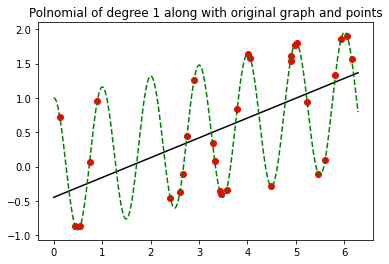

In [12]:
#Plot Explicitly for Degree 1
fig = plt.figure()
plt.plot(X_, y_values[0], color = 'black') #The Polynomial fitted on the generated data points
plt.scatter(X, Y, color = 'red')           # The points generated and their predicted values
plt.plot(X_, Y_, '--', color = 'green')    # the original function without noise
plt.title("Polnomial of degree 1 along with original graph and points")
plt.show()

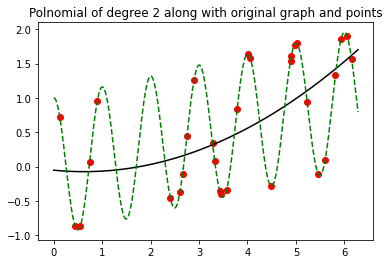

In [13]:
#Plot Explicitly for Degree 2
fig = plt.figure()
plt.plot(X_, y_values[1], color = 'black') #The Polynomial fitted on the generated data points
plt.scatter(X, Y, color = 'red')           # The points generated and their predicted values
plt.plot(X_, Y_, '--', color = 'green')    # the original function without noise
plt.title("Polnomial of degree 2 along with original graph and points")
plt.show()

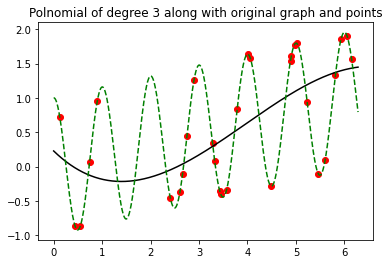

In [14]:
#Plot Explicitly for Degree 3
fig = plt.figure()
plt.plot(X_, y_values[2], color = 'black') #The Polynomial fitted on the generated data points
plt.scatter(X, Y, color = 'red')           # The points generated and their predicted values
plt.plot(X_, Y_, '--', color = 'green')    # the original function without noise
plt.title("Polnomial of degree 3 along with original graph and points")
plt.show()

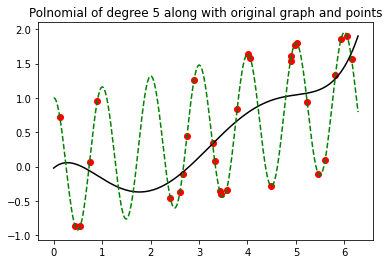

In [15]:
#Plot Explicitly for Degree 5
fig = plt.figure()
plt.plot(X_, y_values[3], color = 'black') #The Polynomial fitted on the generated data points
plt.scatter(X, Y, color = 'red')           # The points generated and their predicted values
plt.plot(X_, Y_, '--', color = 'green')    # the original function without noise
plt.title("Polnomial of degree 5 along with original graph and points")
plt.show()

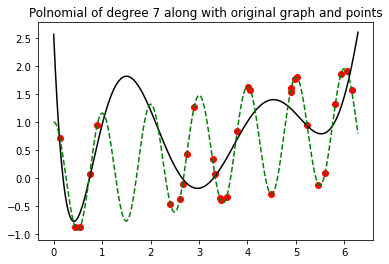

In [16]:
#Plot Explicitly for Degree 7
fig = plt.figure()
plt.plot(X_, y_values[4], color = 'black') #The Polynomial fitted on the generated data points
plt.scatter(X, Y, color = 'red')           # The points generated and their predicted values
plt.plot(X_, Y_, '--', color = 'green')    # the original function without noise
plt.title("Polnomial of degree 7 along with original graph and points")
plt.show()

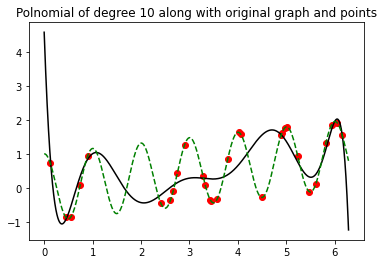

In [17]:
#Plot Explicitly for Degree 10
fig = plt.figure()
plt.plot(X_, y_values[5], color = 'black') #The Polynomial fitted on the generated data points
plt.scatter(X, Y, color = 'red')           # The points generated and their predicted values
plt.plot(X_, Y_, '--', color = 'green')    # the original function without noise
plt.title("Polnomial of degree 10 along with original graph and points")
plt.show()

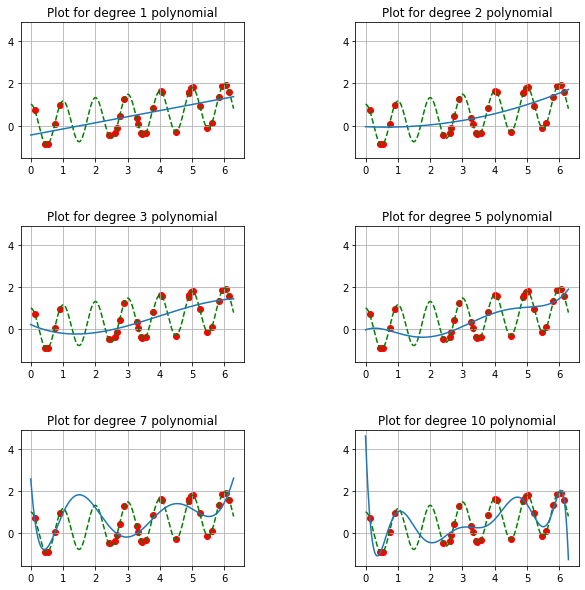

In [18]:
# Plots of all polynomials side by side
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
old = 0
for i, d in enumerate(degrees):
    if(old):
        ax = fig.add_subplot(3, 2, i+1, sharex = old, sharey = old)
    else:
        ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(f"Plot for degree {d} polynomial")
    ax.scatter(X,Y, color = 'red')
    plt.plot(X_, Y_, '--', color = 'green')
    ax.plot(X_, y_values[i])
    ax.grid()
    old = ax

## Observations:

In [19]:
def find_mse(y_predict, y_actual):
    n = len(y_predict)
    mse = 0
    for i in range(n):
        mse = mse + (y_predict[i] - y_actual[i])**2
    mse = mse/n
    return mse

In [20]:
# generating about 20 new data points for testing above trained models
x_test = []
while len(x_test)<=20:
    temp = np.random.uniform(0, 2*pi)
    while temp in X:
        temp = np.random.uniform(0, 2*pi)
    x_test.append(temp)

In [21]:
# finding actual/true values at above points
y_test_actual = []
for i in range(len(x_test)):
    y_test_actual.append(f1(x_test[i]) + np.random.normal(0, 0.004))

In [22]:
# the predicted values according to trained models
y_test_predicted = []

for i, d in enumerate(degrees):
    y_temp = []
    for x in x_test:
        y_temp.append(fp(x, coeff[i]))
    y_test_predicted.append(y_temp)

In [23]:
# Calculating MSE for the trained models on above dataset
mse_list1 = []
for i, d in enumerate(degrees):
    mse_list1.append(find_mse(y_test_predicted[i], y_test_actual))
mse_list1    

[0.3520536047921756,
 0.36636567742171944,
 0.45339648767133284,
 0.5438766278729502,
 0.5071189751577312,
 0.6161948002545043]

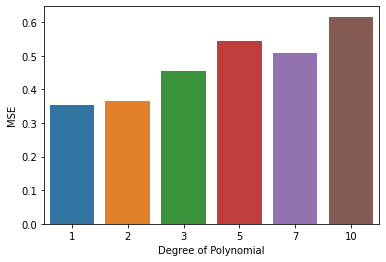

In [24]:
sns.barplot(x = list(degrees), y = mse_list1)
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE")
plt.show()

### Here I observe least MSE and hence RMSE is for model with degree 1

## Part 3: Experimenting with more Data Points

In [25]:
def generate_data(n):
    np.random.seed(0)
    x_new = np.random.uniform(0, 2*pi, n)
    x_test = x_new[:n//5]
    x_train = x_new[n//5:]
    y_train = []
    for i in range(len(x_train)):
        y_train.append(f1(x_train[i]) + np.random.normal(0, 0.004))
    y_test = []
    for i in range(len(x_test)):
        y_test.append(f1(x_test[i]) + np.random.normal(0, 0.004))
    return x_train, x_test, y_train, y_test

### For Total n = 50 points split in 80:20 ratio of train and test

In [26]:
x_train, x_test, y_train, y_test = generate_data(50)

In [27]:
new_coeff = []
for i, deg in enumerate(degrees):
    new_coeff.append(train_poly_reg(deg, x_train, y_train))

In [28]:
# Data for Plotting Polynomials Fitted:
new_y_values = []
for i, deg in enumerate(degrees):
    y_temp = []
    for x_temp in X_:
        y_temp.append(fp(x_temp, new_coeff[i]))
    new_y_values.append(y_temp)

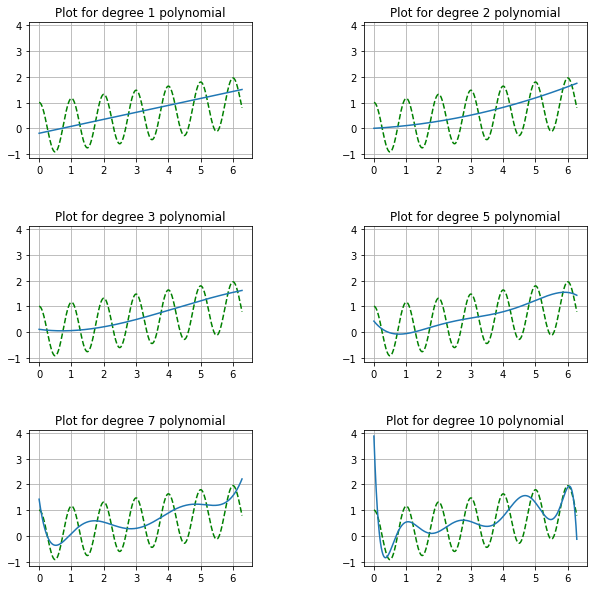

In [29]:
# Plots of all polynomials side by side
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
old = 0
for i, d in enumerate(degrees):
    if(old):
        ax = fig.add_subplot(3, 2, i+1, sharex = old, sharey = old)
    else:
        ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(f"Plot for degree {d} polynomial")
#     ax.scatter(x_train,y_train, color = 'red',s = 5)
    plt.plot(X_, Y_, '--', color = 'green')
    ax.plot(X_, new_y_values[i])
    ax.grid()
    old = ax

In [30]:
y_test_predicted = []

for i, d in enumerate(degrees):
    y_temp = []
    for x in x_test:
        y_temp.append(fp(x, new_coeff[i]))
    y_test_predicted.append(y_temp)

In [31]:
mse_list1 = []
for i, d in enumerate(degrees):
    mse_list1.append(find_mse(y_test_predicted[i], y_test))
mse_list1    

[0.7535781748938704,
 0.696264009301077,
 0.6951986748080519,
 0.7389140755641799,
 0.616096872459035,
 0.6670361180047087]

## For n = 100 in 80:20 split:

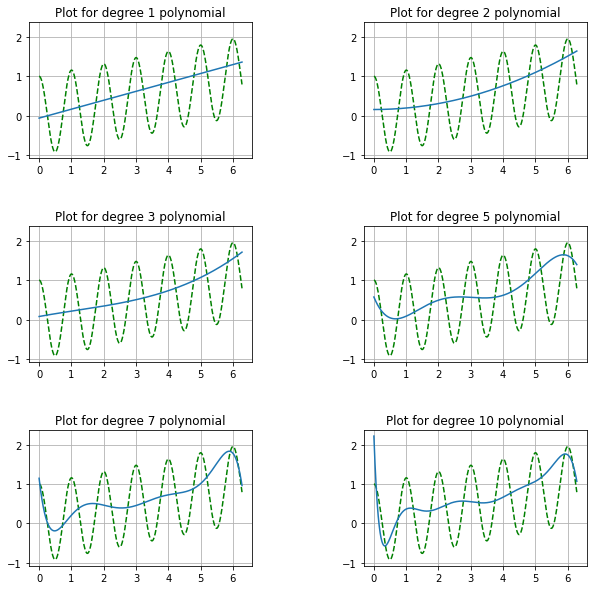

In [32]:
x_train, x_test, y_train, y_test = generate_data(100)
new_coeff = []
for i, deg in enumerate(degrees):
    new_coeff.append(train_poly_reg(deg, x_train, y_train))

# Data for Plotting Polynomials Fitted:
new_y_values = []
for i, deg in enumerate(degrees):
    y_temp = []
    for x_temp in X_:
        y_temp.append(fp(x_temp, new_coeff[i]))
    new_y_values.append(y_temp)
    
# Plots of all polynomials side by side
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
old = 0
for i, d in enumerate(degrees):
    if(old):
        ax = fig.add_subplot(3, 2, i+1, sharex = old, sharey = old)
    else:
        ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(f"Plot for degree {d} polynomial")
#     ax.scatter(x_train,y_train, color = 'red',s = 5)
    plt.plot(X_, Y_, '--', color = 'green')
    ax.plot(X_, new_y_values[i])
    ax.grid()
    old = ax

In [33]:
y_test_predicted = []

for i, d in enumerate(degrees):
    y_temp = []
    for x in x_test:
        y_temp.append(fp(x, new_coeff[i]))
    y_test_predicted.append(y_temp)

mse_list2 = []
for i, d in enumerate(degrees):
    mse_list2.append(find_mse(y_test_predicted[i], y_test))
mse_list2    

[0.6807569777692943,
 0.6523235020317009,
 0.6507496573649295,
 0.7016052931824379,
 0.6595836844893641,
 0.6191115294924979]

## For n = 1000 in 80:20 split

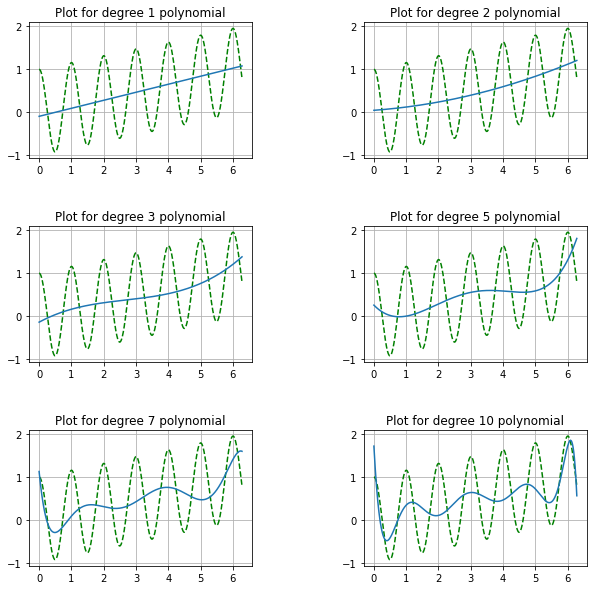

In [34]:
x_train, x_test, y_train, y_test = generate_data(1000)
new_coeff = []
for i, deg in enumerate(degrees):
    new_coeff.append(train_poly_reg(deg, x_train, y_train))

# Data for Plotting Polynomials Fitted:
new_y_values = []
for i, deg in enumerate(degrees):
    y_temp = []
    for x_temp in X_:
        y_temp.append(fp(x_temp, new_coeff[i]))
    new_y_values.append(y_temp)
    
# Plots of all polynomials side by side
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
old = 0
for i, d in enumerate(degrees):
    if(old):
        ax = fig.add_subplot(3, 2, i+1, sharex = old, sharey = old)
    else:
        ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(f"Plot for degree {d} polynomial")
#     ax.scatter(x_train,y_train, color = 'red',s = 5)
    plt.plot(X_, Y_, '--', color = 'green')
    ax.plot(X_, new_y_values[i])
    ax.grid()
    old = ax

In [35]:
y_test_predicted = []

for i, d in enumerate(degrees):
    y_temp = []
    for x in x_test:
        y_temp.append(fp(x, new_coeff[i]))
    y_test_predicted.append(y_temp)

mse_list3 = []
for i, d in enumerate(degrees):
    mse_list3.append(find_mse(y_test_predicted[i], y_test))
mse_list3    

[0.499541201776065,
 0.4866803307081324,
 0.4831885415907828,
 0.4784370635161918,
 0.45566769540023144,
 0.41903589520289636]

## For n = 10000 in 80:20 split:

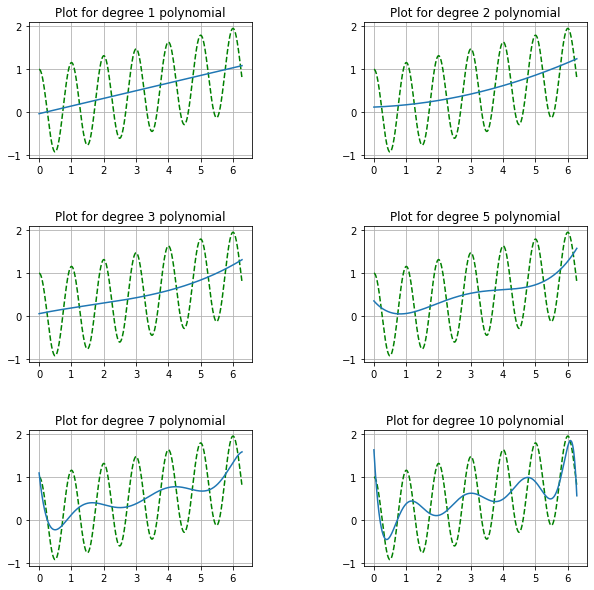

In [36]:
x_train, x_test, y_train, y_test = generate_data(10000)
new_coeff = []
for i, deg in enumerate(degrees):
    new_coeff.append(train_poly_reg(deg, x_train, y_train))

# Data for Plotting Polynomials Fitted:
new_y_values = []
for i, deg in enumerate(degrees):
    y_temp = []
    for x_temp in X_:
        y_temp.append(fp(x_temp, new_coeff[i]))
    new_y_values.append(y_temp)
    
# Plots of all polynomials side by side
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
old = 0
for i, d in enumerate(degrees):
    if(old):
        ax = fig.add_subplot(3, 2, i+1, sharex = old, sharey = old)
    else:
        ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(f"Plot for degree {d} polynomial")
#     ax.scatter(x_train,y_train, color = 'red',s = 5)
    plt.plot(X_, Y_, '--', color = 'green')
    ax.plot(X_, new_y_values[i])
    ax.grid()
    old = ax

In [37]:
y_test_predicted = []

for i, d in enumerate(degrees):
    y_temp = []
    for x in x_test:
        y_temp.append(fp(x, new_coeff[i]))
    y_test_predicted.append(y_temp)

mse_list4 = []
for i, d in enumerate(degrees):
    mse_list4.append(find_mse(y_test_predicted[i], y_test))
mse_list4    

[0.4990198726816983,
 0.4919869518946702,
 0.4894631801132354,
 0.47850105403449467,
 0.45210770907514836,
 0.40768930042311274]

In [38]:
num = [50, 100, 1000, 10000]
mse_vals = np.array([mse_list1, mse_list2, mse_list3, mse_list4])

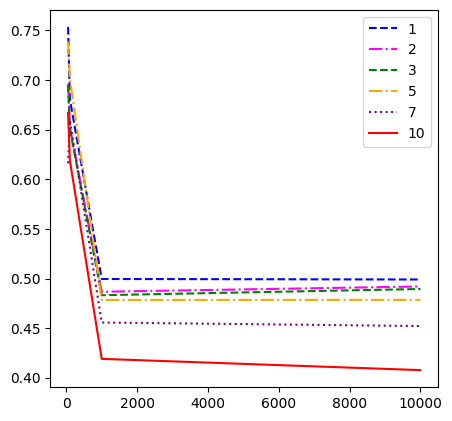

In [39]:
fig = plt.figure(figsize = (5,5), dpi = 100)
plt.plot(num, mse_vals[:, 0],'--',color = 'blue', label = "1")
plt.plot(num, mse_vals[:, 1],'-.', color = 'magenta', label = "2")
plt.plot(num, mse_vals[:, 2],'--' ,color = 'green', label = "3")
plt.plot(num, mse_vals[:, 3], '-.',color = 'orange', label = "5")
plt.plot(num, mse_vals[:, 4], ':',color = 'purple', label = "7")
plt.plot(num, mse_vals[:, 5], '-',color = 'red',label =  "10")
plt.legend(loc = "upper right")
plt.show()

## Initially large n polynomial was overfitting for less training data as it had more parameters to train, as training data increased we see largest n had least mse